In [1]:
import csv
import matplotlib.pyplot as plt

def plot_testing_accuracies_from_multiple_csv(title, filenames, labels, save_path):
    """
    Load testing accuracies from multiple CSV files and plot testing accuracy vs. number of rounds for each file.
    
    Parameters:
    - filenames: List of CSV file names containing the testing accuracy and round data.
    """
    line_styles = ['-', '--', '-.', ':', '-', '--', '-.']  # List of line styles for variety
    plt.figure(dpi=300) 

    rounds = []
    for i, filename in enumerate(filenames):
        rounds = []
        testing_accuracies = []
        
        try:
            with open(f'../results/{filename}', 'r') as csvfile:
                reader = csv.reader(csvfile, delimiter=',')
                
                # Extract data from CSV
                for row in reader:
                    rounds = list(range(0, len(row) + 1))
                    testing_accuracies = [0.0] + [float(i) for i in row]
            
            # Plotting with different line styles and colors but without markers
            label = labels[i]
            plt.plot(rounds, testing_accuracies, linestyle=line_styles[i % len(line_styles)], label=label)
        except:
            pass

    plt.title(title)
    plt.xlabel('Number of Rounds')
    plt.ylabel('Testing Accuracy')
    
    plt.xlim(0, 100)  # Assuming your rounds go from 0 to 1000
    plt.ylim(0, 1)  # Ensure y-axis goes from 0 to 1
    
    # Set x-axis and y-axis ticks to match the style in the image
    plt.xticks(range(0, 100 + 1, 20))  # Set x-ticks from 0 to 1000 with a step of 200
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Set y-ticks at 0, 0.25, 0.5, 0.75, 1.0
    
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.savefig(f'../plots/{save_path}', bbox_inches='tight')
    plt.show()

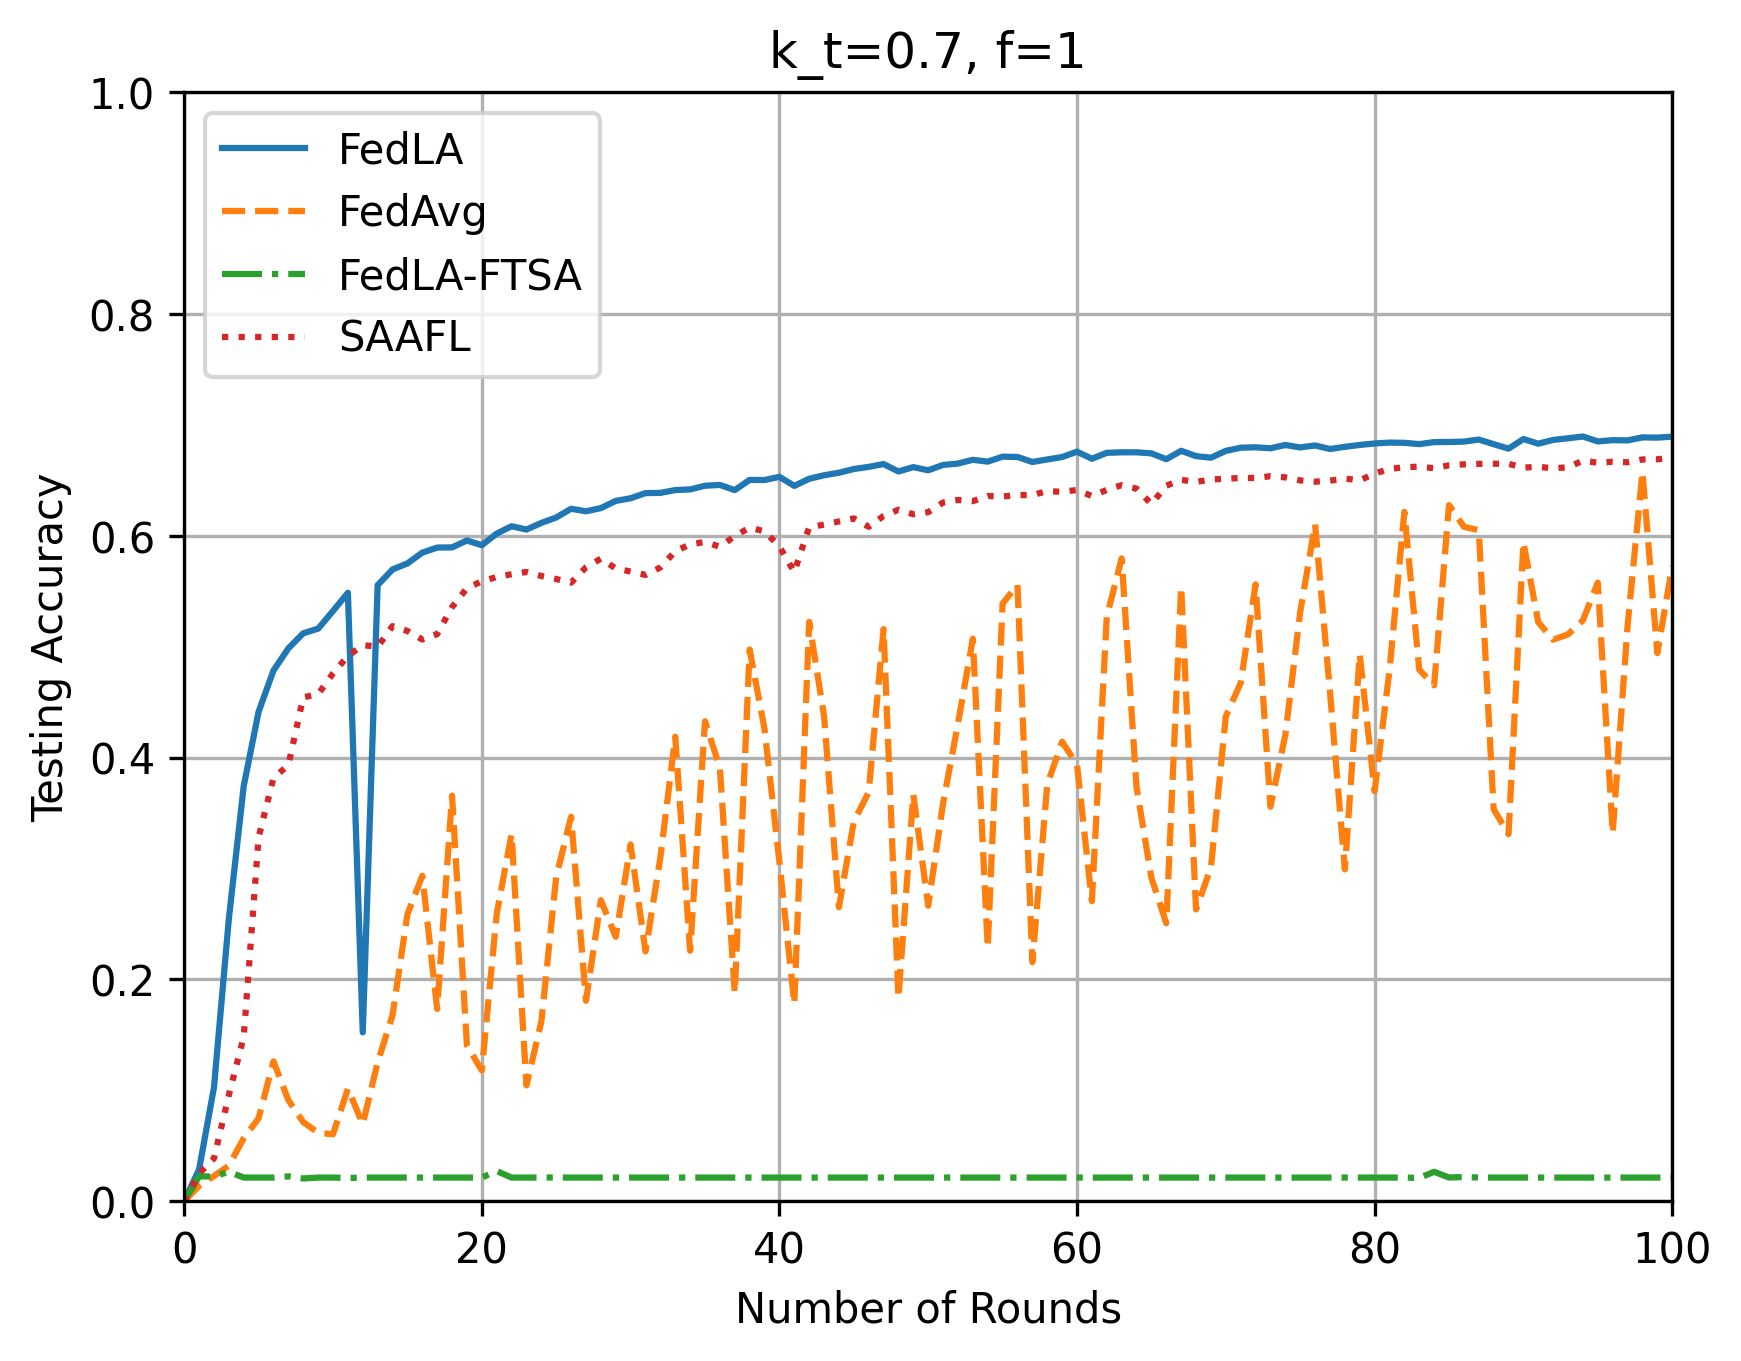

In [2]:
title = 'k_t=0.7, f=1'
filenames = [
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.7_uniqueC1_noniidS7_unequal.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedavg_unweighted_sci2400_frac0.7_uniqueC1_noniidS7_unequal.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.7_uniqueC1_noniidS7_unequal_secagg_dropout1.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.7_uniqueC1_noniidS7_unequal_secagg_dropout1_use_approx_updates.csv',

]
labels = [
    'FedLA',
    'FedAvg',
    'FedLA-FTSA',
    'SAAFL'
]
plot_testing_accuracies_from_multiple_csv(title, filenames, labels, 'emnist-balanced_testacc_epochs100_local_ep10_lr0.01_frac0.7_uniqueC1_noniidS7_unequal.png')

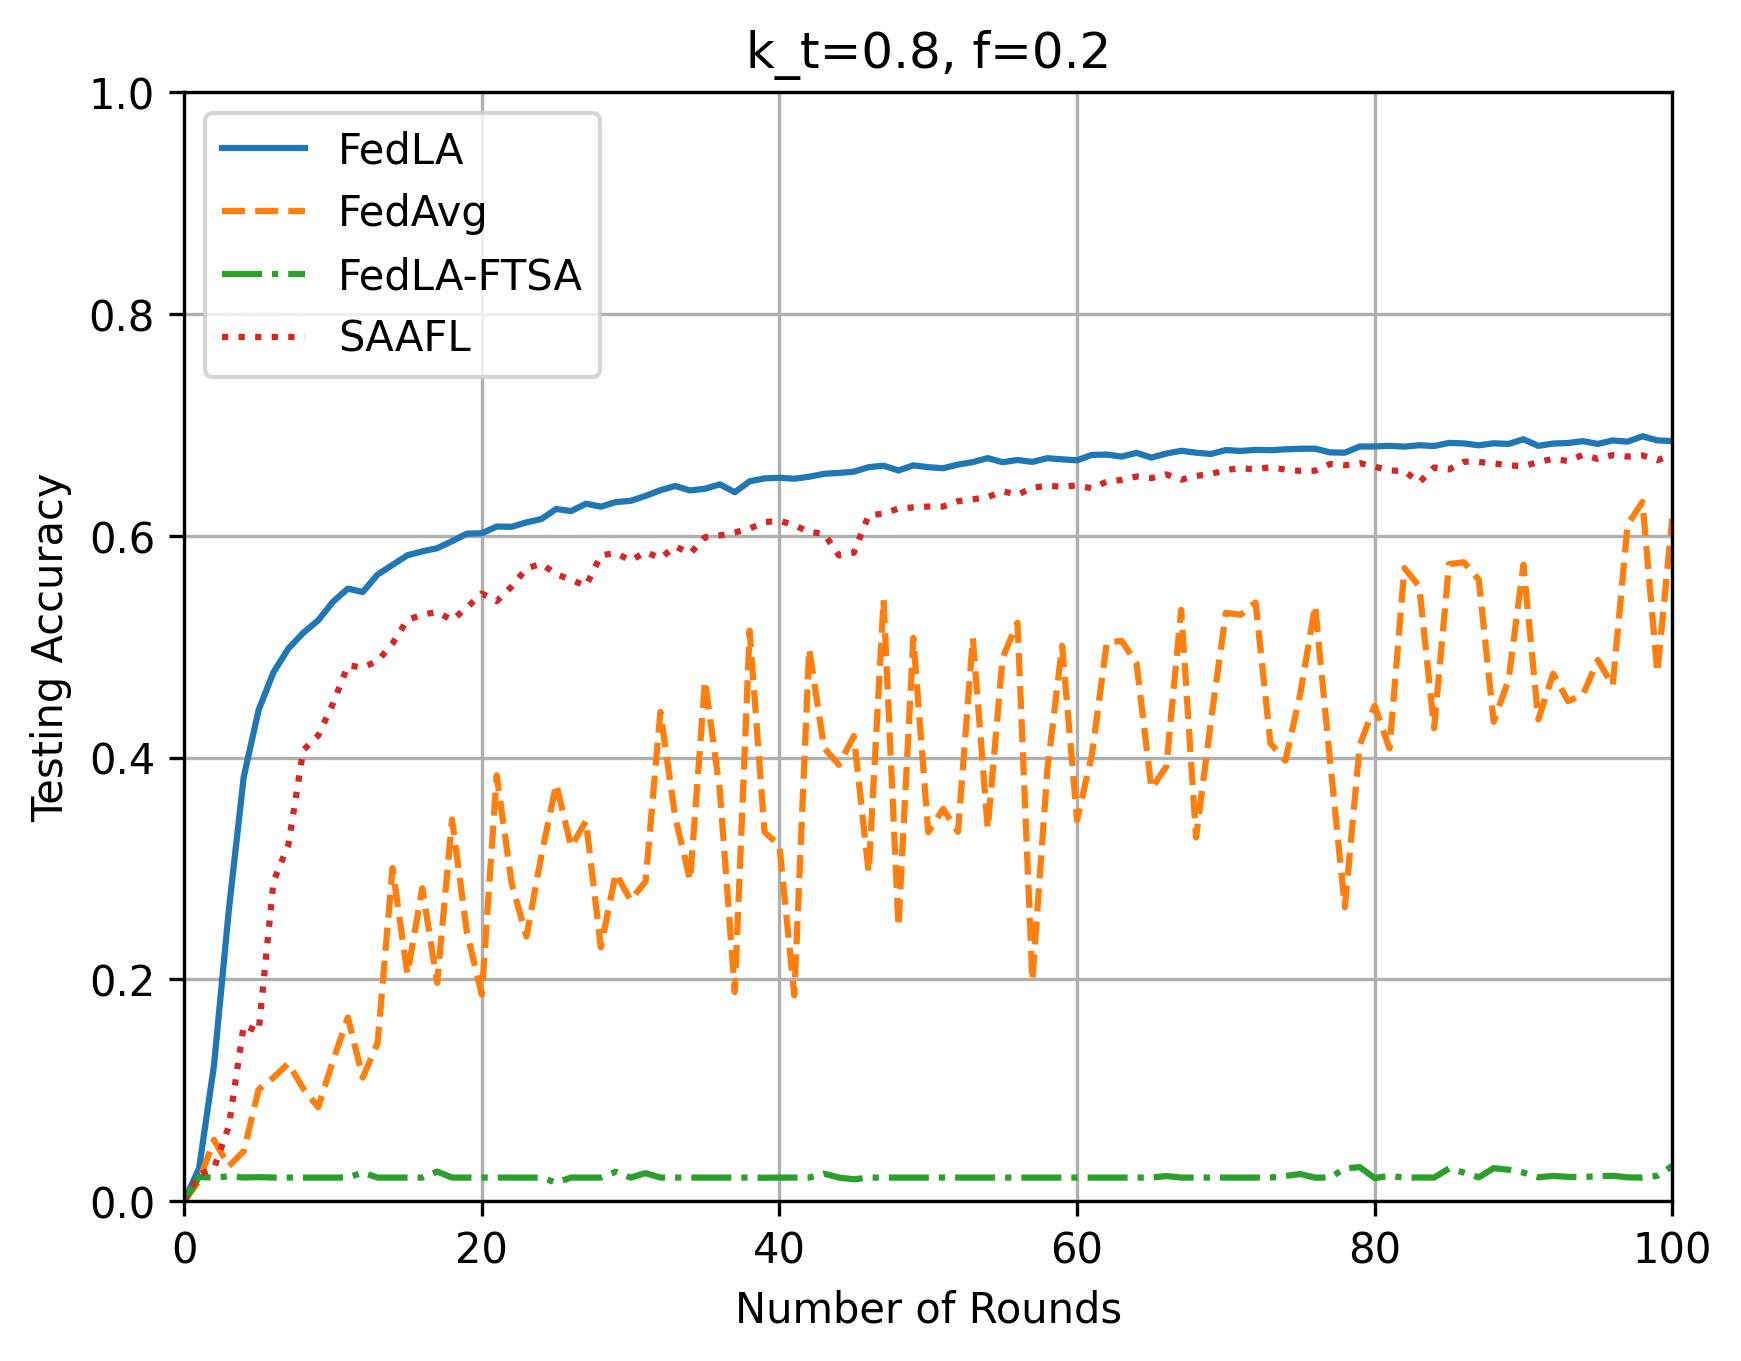

In [3]:
title = 'k_t=0.8, f=0.2'
filenames = [
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.8_uniqueC1_noniidS7_unequal.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedavg_unweighted_sci2400_frac0.8_uniqueC1_noniidS7_unequal.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.8_uniqueC1_noniidS7_unequal_secagg_dropout2.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.8_uniqueC1_noniidS7_unequal_secagg_dropout2_use_approx_updates.csv',
]
labels = [
    'FedLA',
    'FedAvg',
    'FedLA-FTSA',
    'SAAFL'
]
plot_testing_accuracies_from_multiple_csv(title, filenames, labels, 'emnist-balanced_testacc_epochs100_local_ep10_lr0.01_frac0.8_uniqueC1_noniidS7_unequal.png')

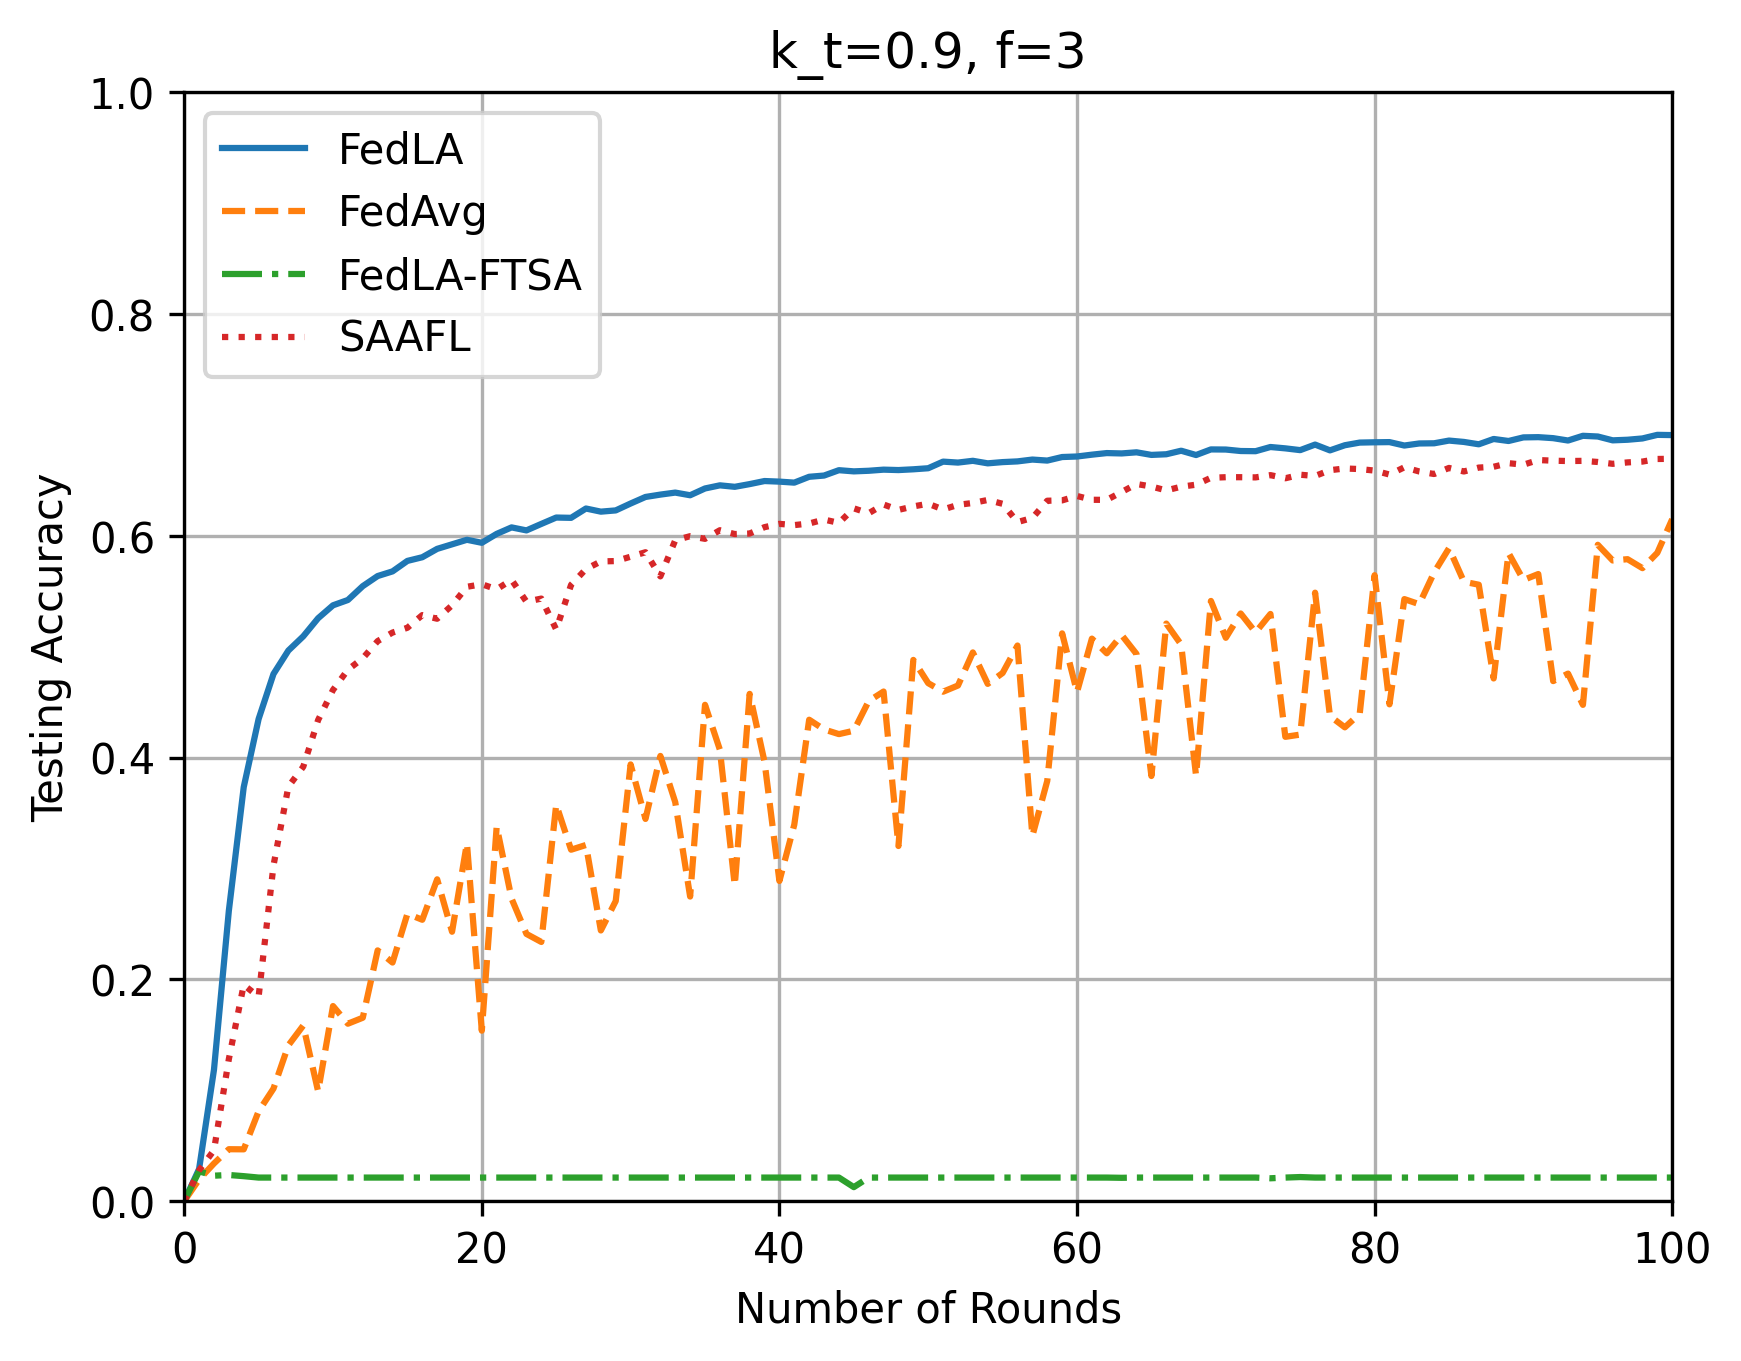

In [4]:
title = title = 'k_t=0.9, f=3'
filenames = [
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.9_uniqueC1_noniidS7_unequal.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedavg_unweighted_sci2400_frac0.9_uniqueC1_noniidS7_unequal.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.9_uniqueC1_noniidS7_unequal_secagg_dropout3.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.9_uniqueC1_noniidS7_unequal_secagg_dropout3_use_approx_updates.csv',
]
labels = [
    'FedLA',
    'FedAvg',
    'FedLA-FTSA',
    'SAAFL'
]
plot_testing_accuracies_from_multiple_csv(title, filenames, labels, 'emnist-balanced_testacc_epochs100_local_ep10_lr0.01_frac0.9_uniqueC1_noniidS7_unequal.png')

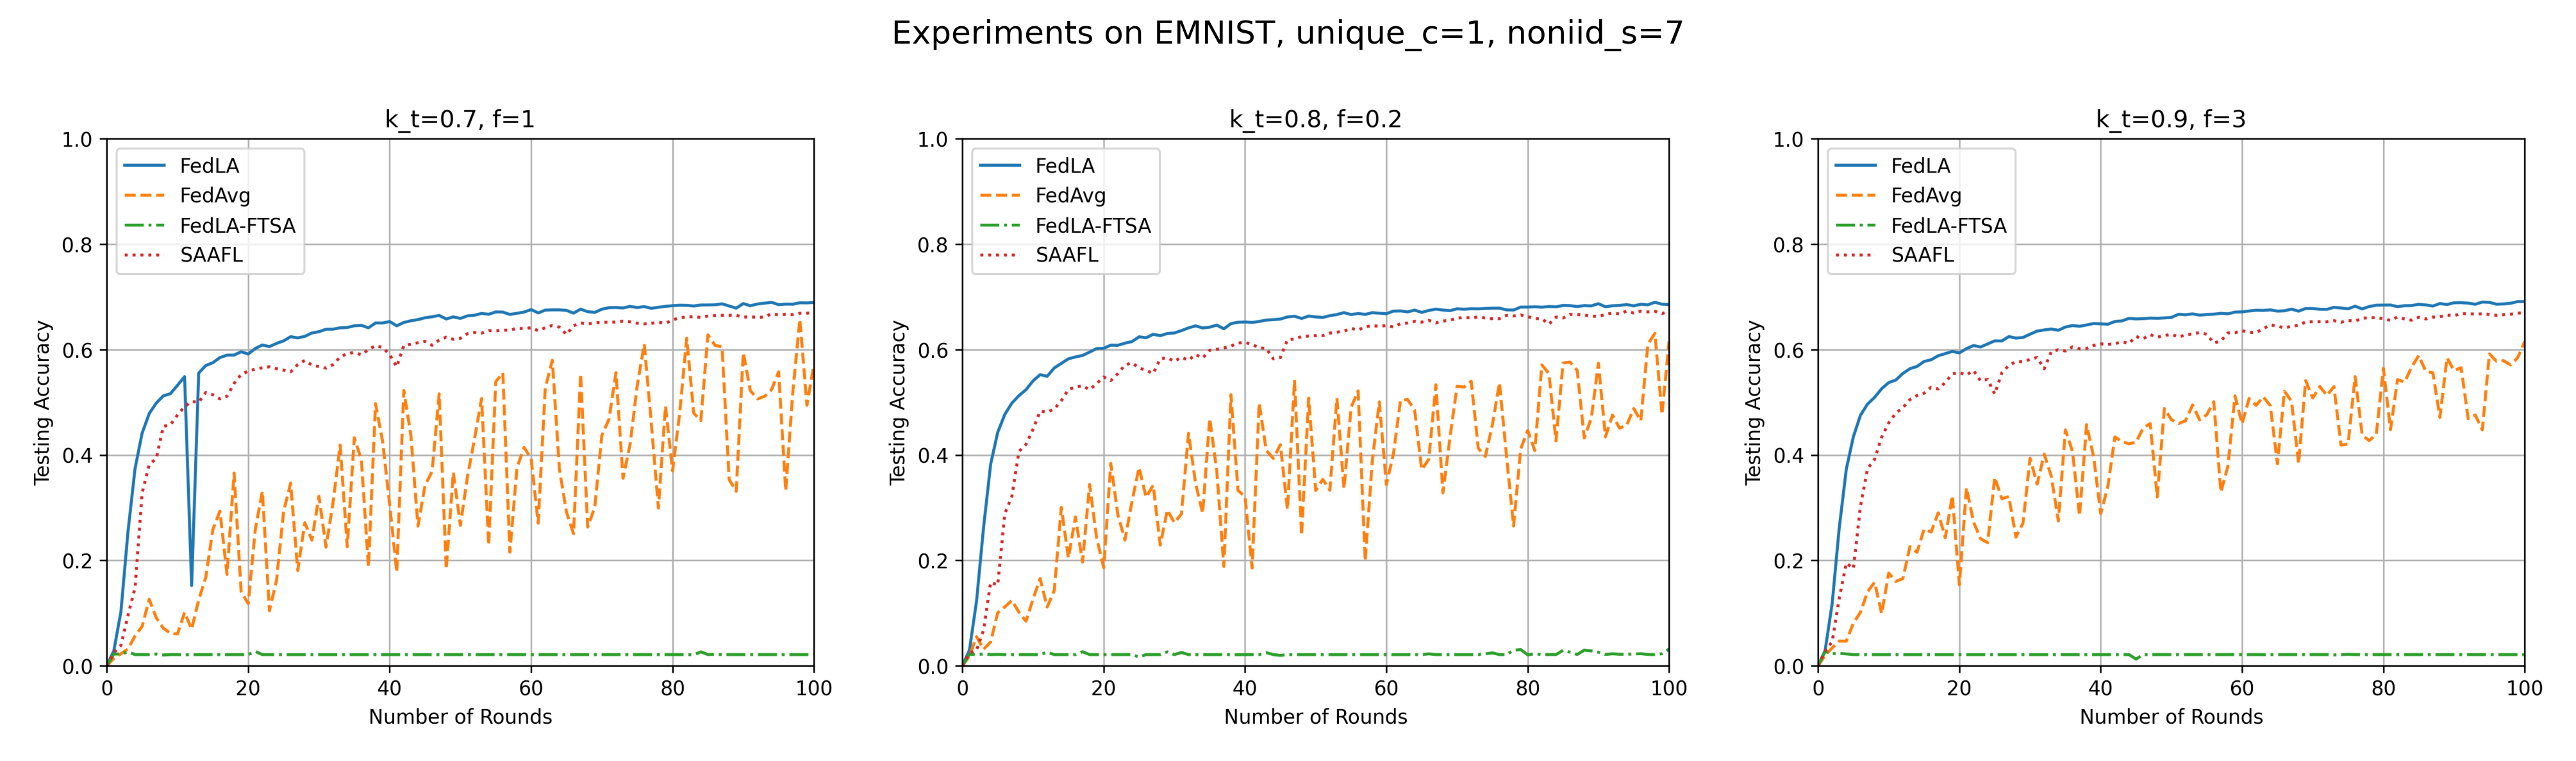

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
imgs = []
uniqueC = 1
noniidS = 7
k_t = [0.7, 0.8, 0.9]
for j in k_t:
    imgs.append(mpimg.imread(f'../plots/emnist-balanced_testacc_epochs100_local_ep10_lr0.01_frac{j}_uniqueC{uniqueC}_noniidS{noniidS}_unequal.png'))

# Create a figure with 3 subplots in a single row, setting dpi here
fig, axes = plt.subplots(1, 3, figsize=(3 * 4.5, 4), dpi=300)

# Display the images
for j in range(len(k_t)):
    axes[j].imshow(imgs[j])
    axes[j].axis('off')

# Add a single overall title
fig.suptitle('Experiments on EMNIST, unique_c=1, noniid_s=7')

# Adjust layout and display the frame
plt.tight_layout()
plt.savefig(f'../plots/emnist-balanced_testacc_epochs100_local_ep10_lr0.01_frac0.7_0.8_0.9_uniqueC1_noniidS7_unequal.png')
plt.show()

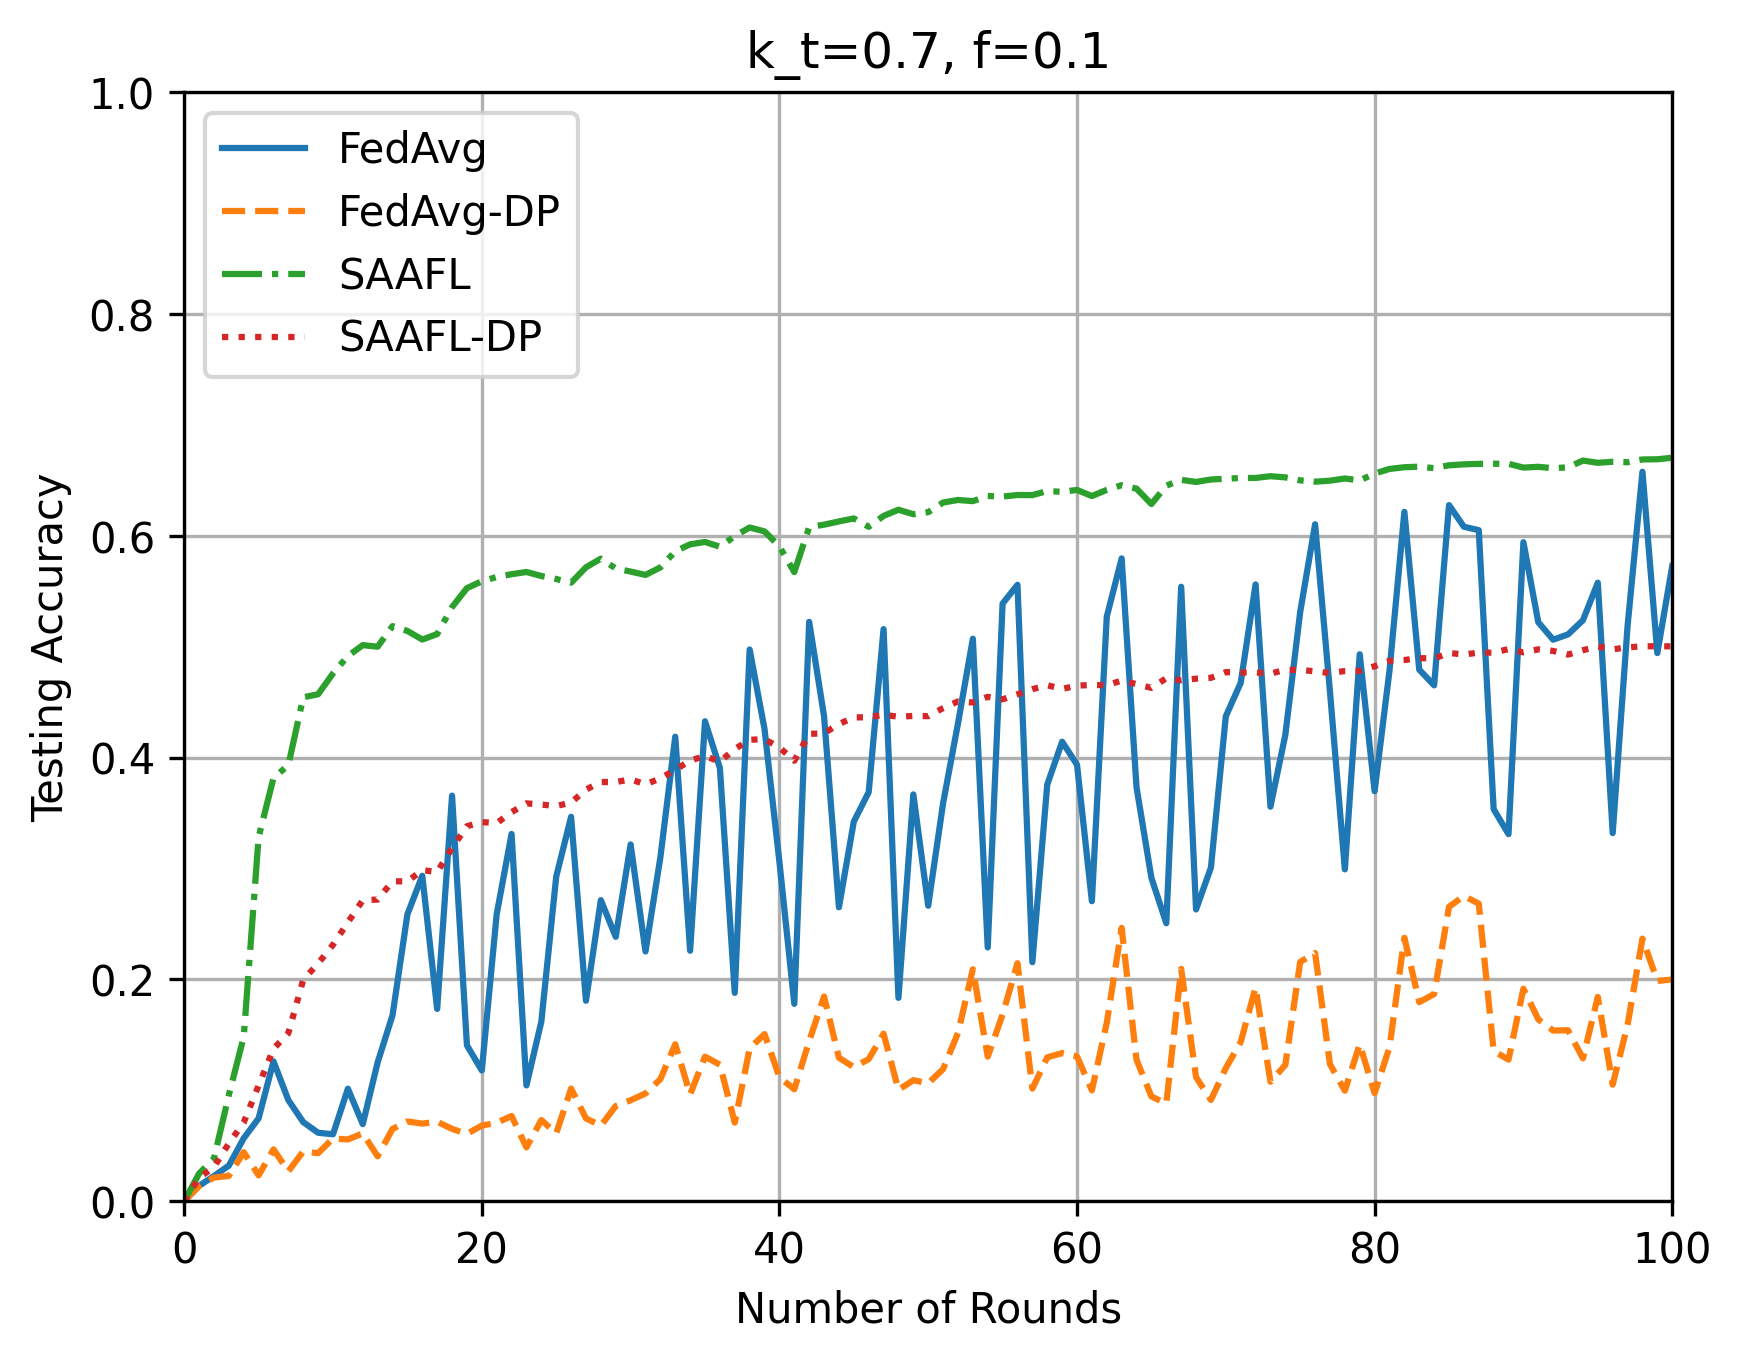

In [6]:
title = 'k_t=0.7, f=0.1'
filenames = [
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedavg_unweighted_sci2400_frac0.7_uniqueC1_noniidS7_unequal.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedavg_unweighted_sci2400_frac0.7_uniqueC1_noniidS7_unequal_local_dp_C7.0_iid_epsilon2.0_non_iid_epsilon2.0_delta1e-05.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.7_uniqueC1_noniidS7_unequal_secagg_dropout1_use_approx_updates.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.7_uniqueC1_noniidS7_unequal_secagg_dropout1_use_approx_updates_local_dp_C7.0_iid_epsilon2.0_non_iid_epsilon2.0_delta1e-05.csv',

]
labels = [
    'FedAvg',
    'FedAvg-DP',
    'SAAFL',
    'SAAFL-DP'
]
plot_testing_accuracies_from_multiple_csv(title, filenames, labels, 'emnist-balanced_testacc_epochs100_local_ep10_lr0.01_frac0.7_uniqueC1_noniidS7_unequal_localdp.png')

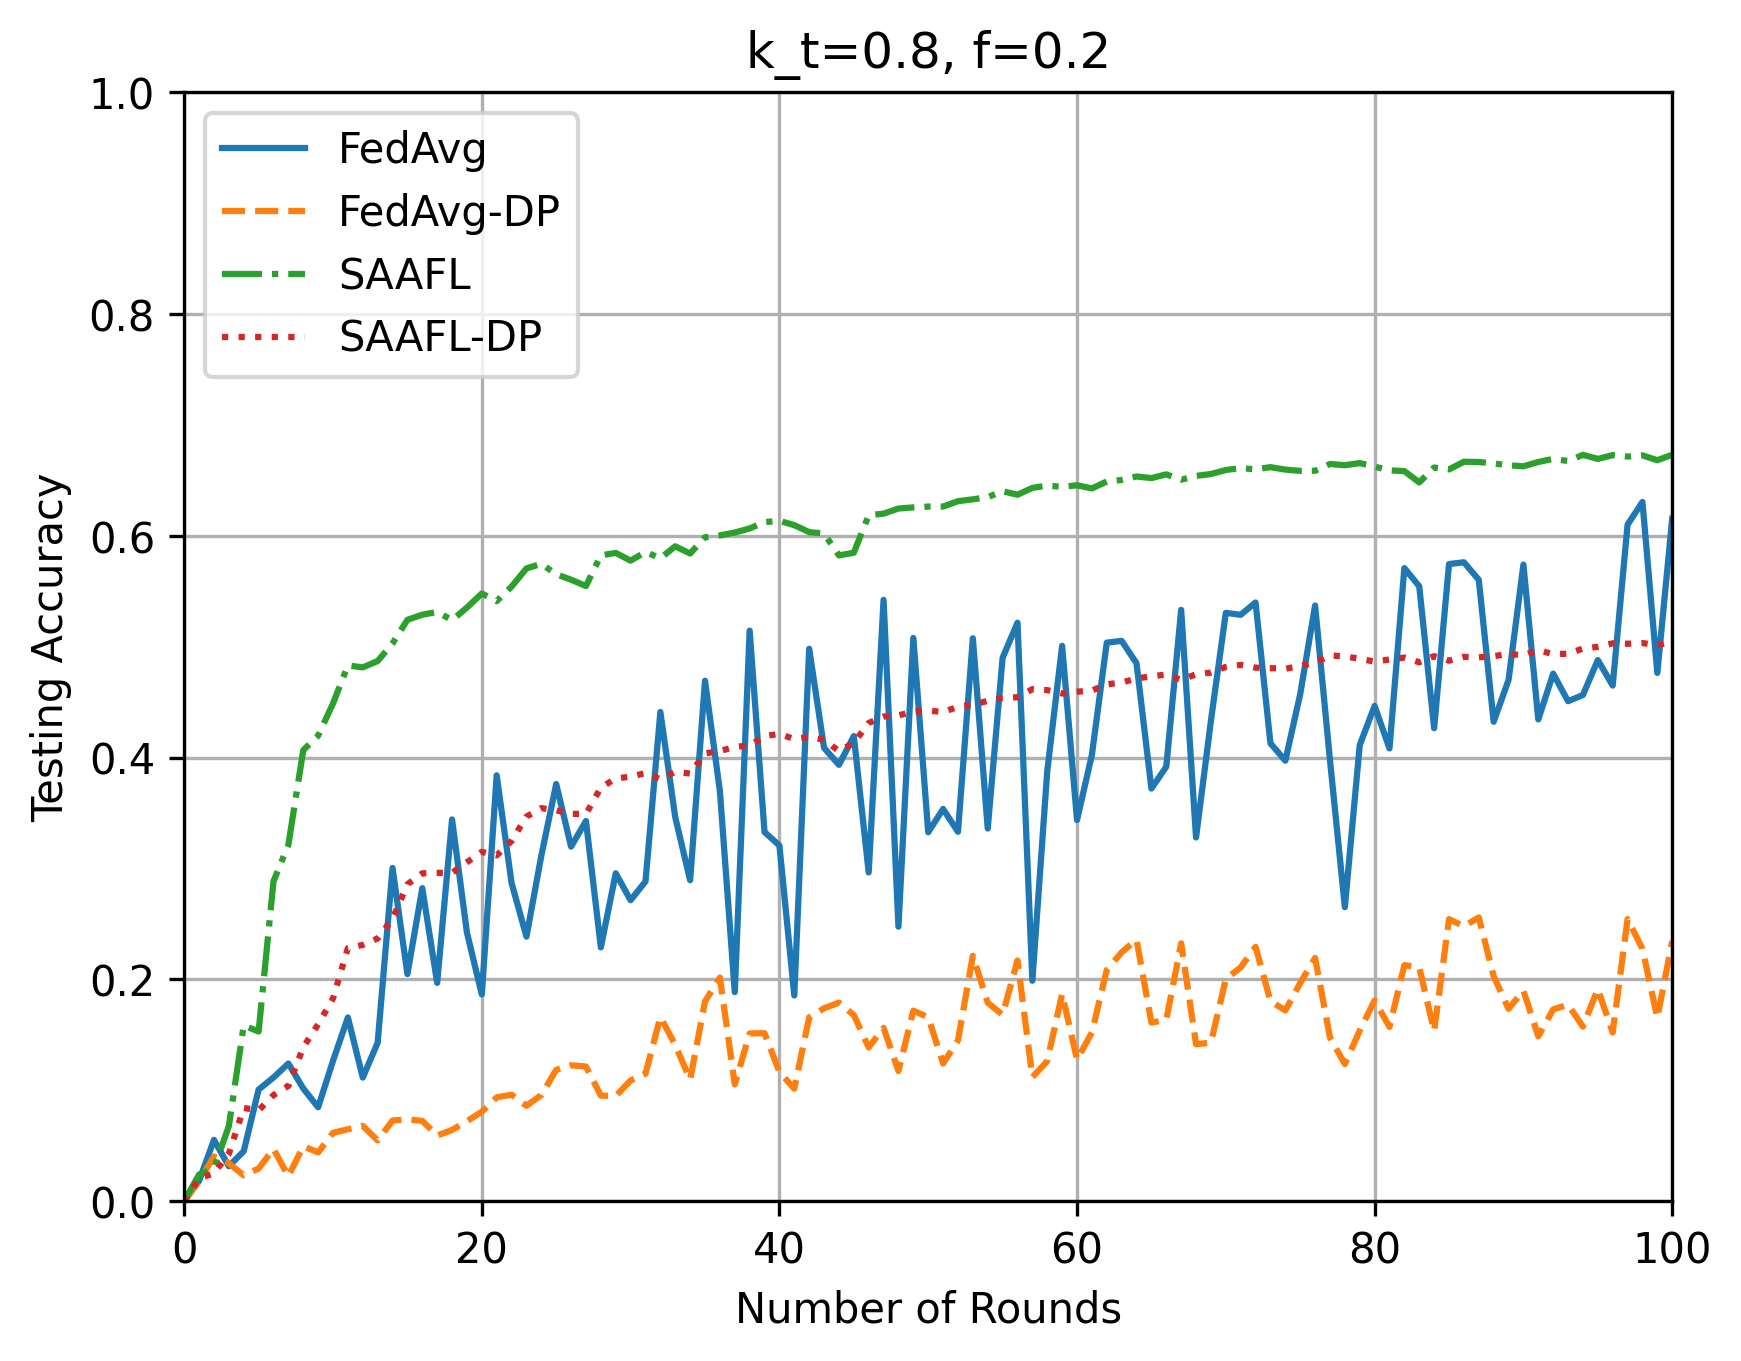

In [7]:
title = 'k_t=0.8, f=0.2'
filenames = [
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedavg_unweighted_sci2400_frac0.8_uniqueC1_noniidS7_unequal.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedavg_unweighted_sci2400_frac0.8_uniqueC1_noniidS7_unequal_local_dp_C7.0_iid_epsilon2.0_non_iid_epsilon2.0_delta1e-05.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.8_uniqueC1_noniidS7_unequal_secagg_dropout2_use_approx_updates.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.8_uniqueC1_noniidS7_unequal_secagg_dropout2_use_approx_updates_local_dp_C7.0_iid_epsilon2.0_non_iid_epsilon2.0_delta1e-05.csv',

]
labels = [
    'FedAvg',
    'FedAvg-DP',
    'SAAFL',
    'SAAFL-DP'
]
plot_testing_accuracies_from_multiple_csv(title, filenames, labels, 'emnist-balanced_testacc_epochs100_local_ep10_lr0.01_frac0.8_uniqueC1_noniidS7_unequal_localdp.png')

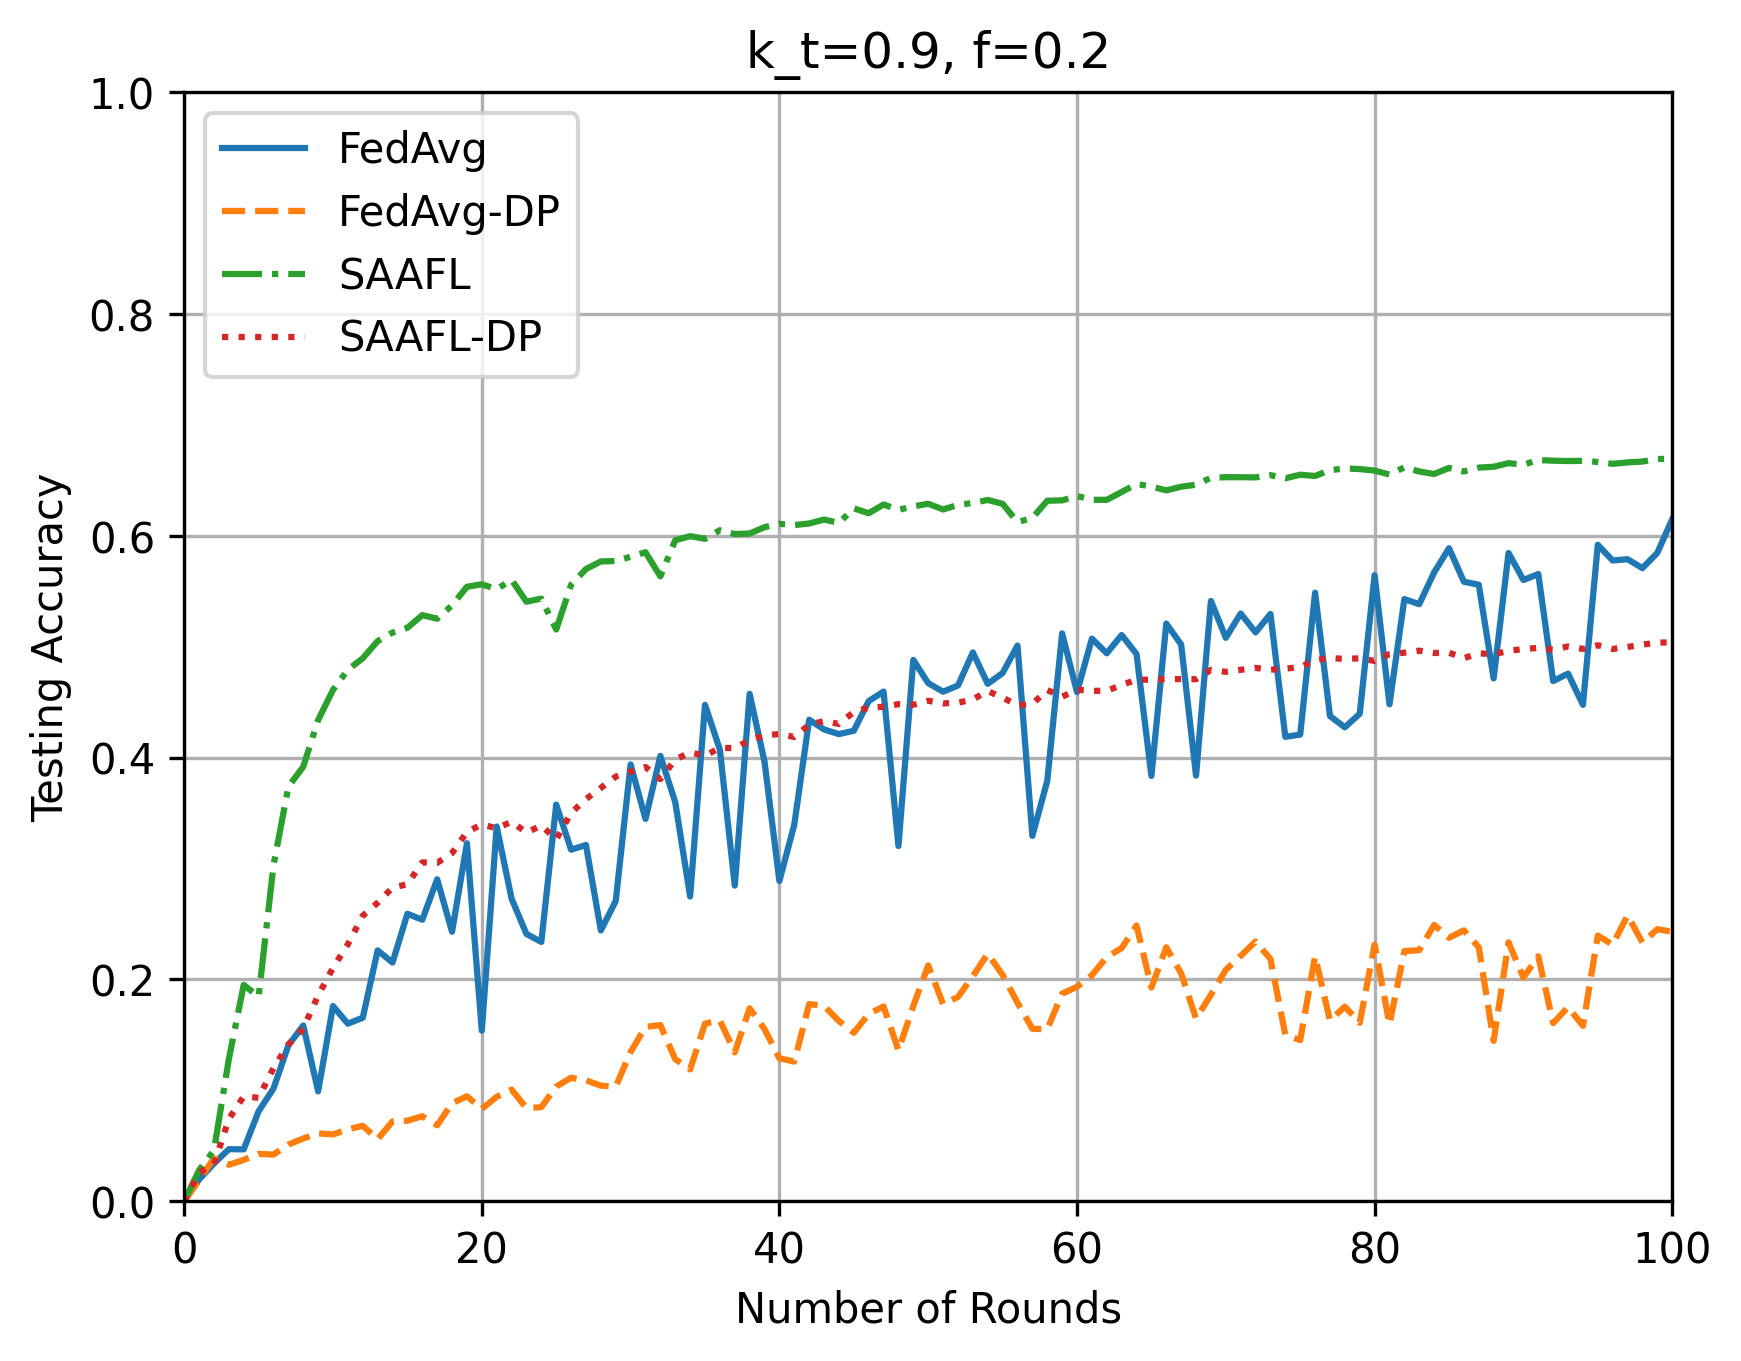

In [8]:
title = 'k_t=0.9, f=0.2'
filenames = [
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedavg_unweighted_sci2400_frac0.9_uniqueC1_noniidS7_unequal.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedavg_unweighted_sci2400_frac0.9_uniqueC1_noniidS7_unequal_local_dp_C7.0_iid_epsilon2.0_non_iid_epsilon2.0_delta1e-05.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.9_uniqueC1_noniidS7_unequal_secagg_dropout3_use_approx_updates.csv',
    'emnist-balanced_noniid_epochs100_local_ep10_lr0.01_fedla_sci2400_frac0.9_uniqueC1_noniidS7_unequal_secagg_dropout3_use_approx_updates_local_dp_C7.0_iid_epsilon2.0_non_iid_epsilon2.0_delta1e-05.csv',

]
labels = [
    'FedAvg',
    'FedAvg-DP',
    'SAAFL',
    'SAAFL-DP'
]
plot_testing_accuracies_from_multiple_csv(title, filenames, labels, 'emnist-balanced_testacc_epochs100_local_ep10_lr0.01_frac0.9_uniqueC1_noniidS7_unequal_localdp.png')

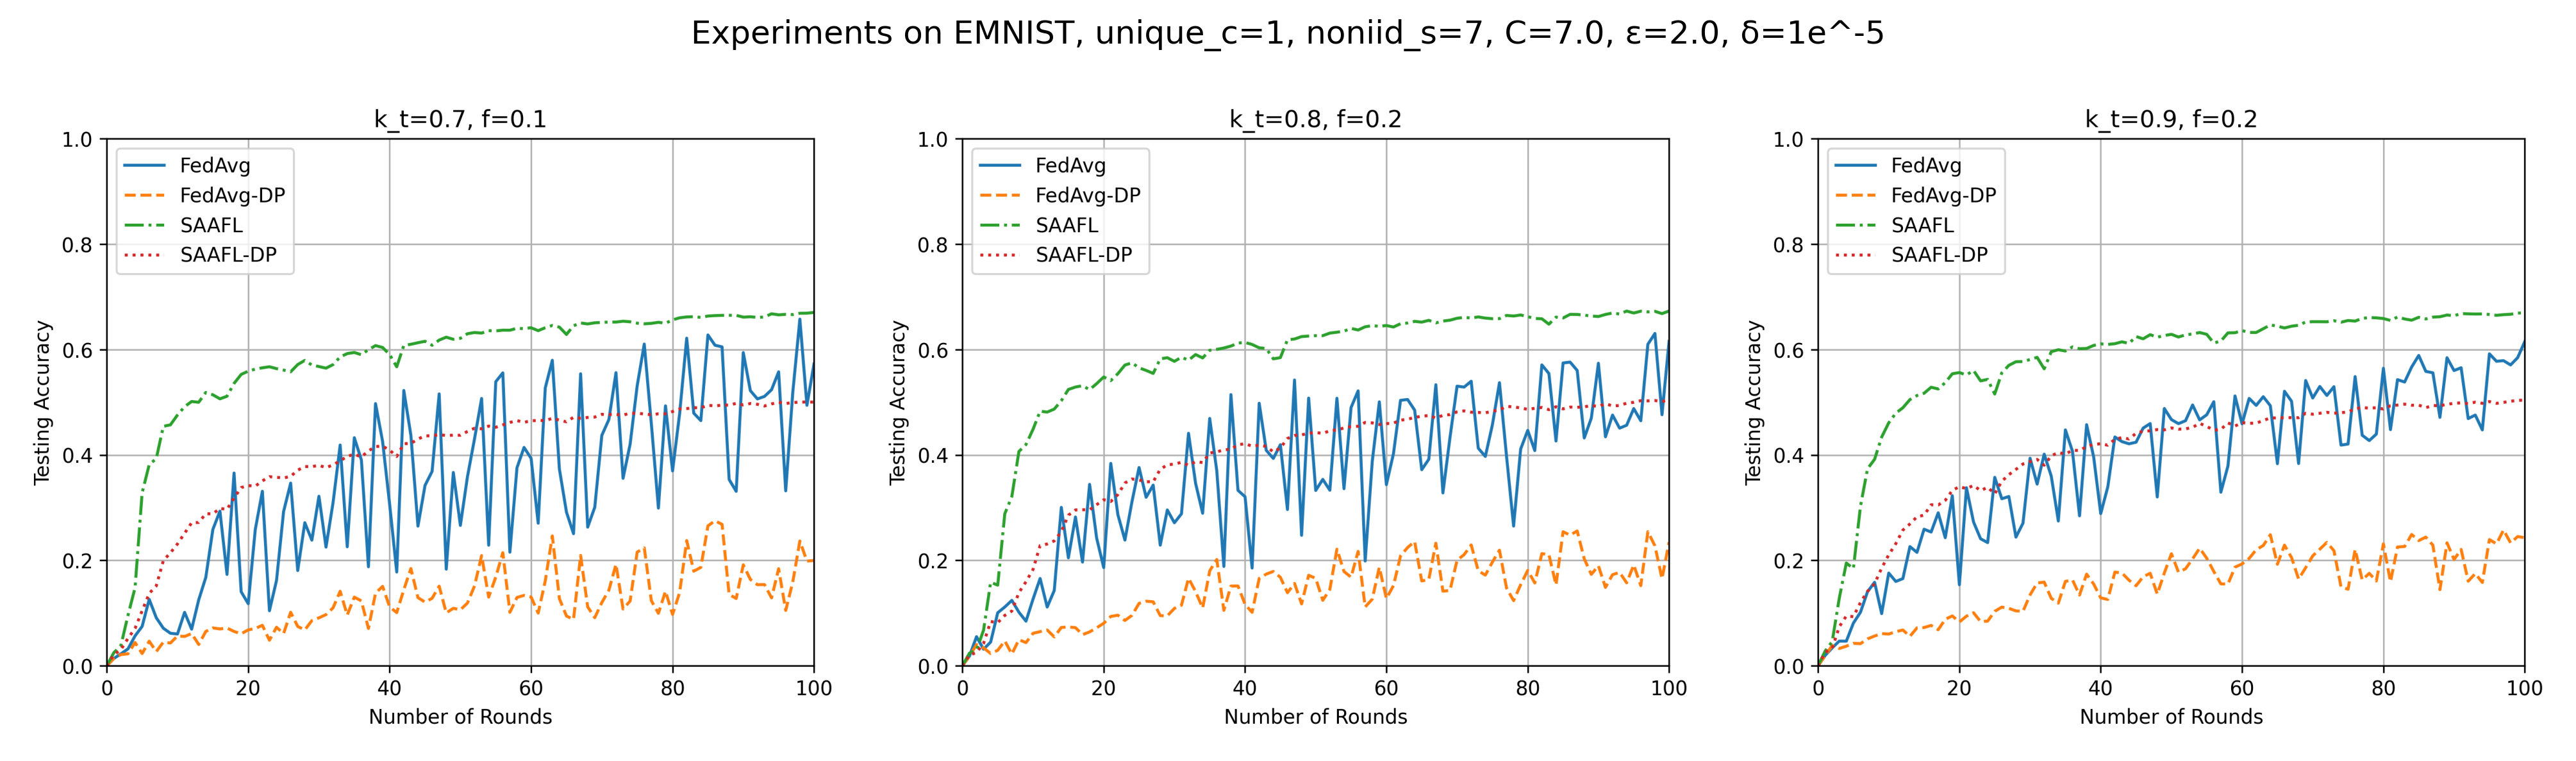

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
imgs = []
uniqueC = 1
noniidS = 7
k_t = [0.7, 0.8, 0.9]
for j in k_t:
    imgs.append(mpimg.imread(f'../plots/emnist-balanced_testacc_epochs100_local_ep10_lr0.01_frac{j}_uniqueC{uniqueC}_noniidS{noniidS}_unequal_localdp.png'))

# Create a figure with 3 subplots in a single row, setting dpi here
fig, axes = plt.subplots(1, 3, figsize=(3 * 4.5, 4), dpi=300)

# Display the images
for j in range(len(k_t)):
    axes[j].imshow(imgs[j])
    axes[j].axis('off')

# Add a single overall title
fig.suptitle('Experiments on EMNIST, unique_c=1, noniid_s=7, C=7.0, ε=2.0, δ=1e^-5')

# Adjust layout and display the frame
plt.tight_layout()
plt.savefig(f'../plots/emnist-balanced_testacc_epochs100_local_ep10_lr0.01_frac0.7_0.8_0.9_uniqueC1_noniidS7_unequal_localdp.png')
plt.show()